In [1]:
import networkx as nx
import numpy as np
from scipy import linalg
import pydot
from IPython.display import Image, display

In [2]:
np.set_printoptions(precision=4)

In [3]:
web_graph = nx.read_gpickle("web_graph.gpickle")
web_graph

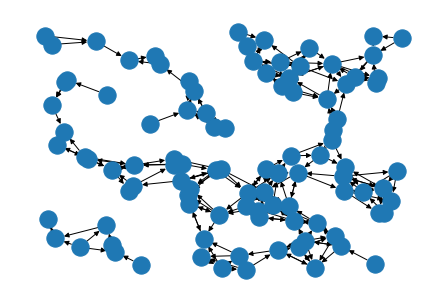

In [4]:
pos = {i: web_graph.nodes[i]['pos'] for i in range(len(web_graph.nodes))}
nx.draw(web_graph, pos)

In [5]:
web_graph.edges

OutEdgeView([(0, 3), (0, 61), (1, 28), (1, 54), (1, 76), (2, 67), (3, 10), (4, 9), (4, 12), (4, 23), (4, 86), (5, 25), (6, 14), (6, 22), (6, 29), (6, 36), (7, 81), (8, 66), (9, 56), (9, 78), (9, 91), (10, 0), (10, 61), (10, 75), (11, 62), (11, 65), (12, 9), (12, 86), (12, 90), (12, 91), (12, 97), (13, 48), (13, 62), (13, 65), (13, 98), (14, 22), (14, 29), (14, 36), (14, 59), (14, 93), (15, 8), (15, 17), (15, 31), (15, 66), (15, 77), (16, 69), (16, 88), (17, 66), (18, 34), (18, 61), (18, 71), (18, 86), (19, 20), (19, 39), (20, 95), (21, 50), (21, 73), (21, 76), (22, 6), (22, 14), (22, 38), (22, 56), (23, 4), (23, 58), (23, 94), (23, 97), (23, 98), (24, 30), (25, 2), (26, 30), (27, 32), (27, 47), (27, 54), (27, 74), (28, 76), (29, 36), (30, 1), (30, 76), (31, 17), (31, 66), (31, 67), (32, 60), (32, 63), (32, 64), (32, 74), (32, 76), (33, 19), (33, 39), (33, 41), (33, 89), (34, 96), (35, 42), (35, 44), (35, 81), (36, 93), (37, 4), (37, 90), (38, 14), (38, 29), (38, 46), (39, 19), (39, 45)

In [6]:
graph = pydot.Dot("Graph")
for node in web_graph.nodes:
    graph.add_node(pydot.Node(node))
for edge in web_graph.edges:
    graph.add_edge(pydot.Edge(edge[0], edge[1]))

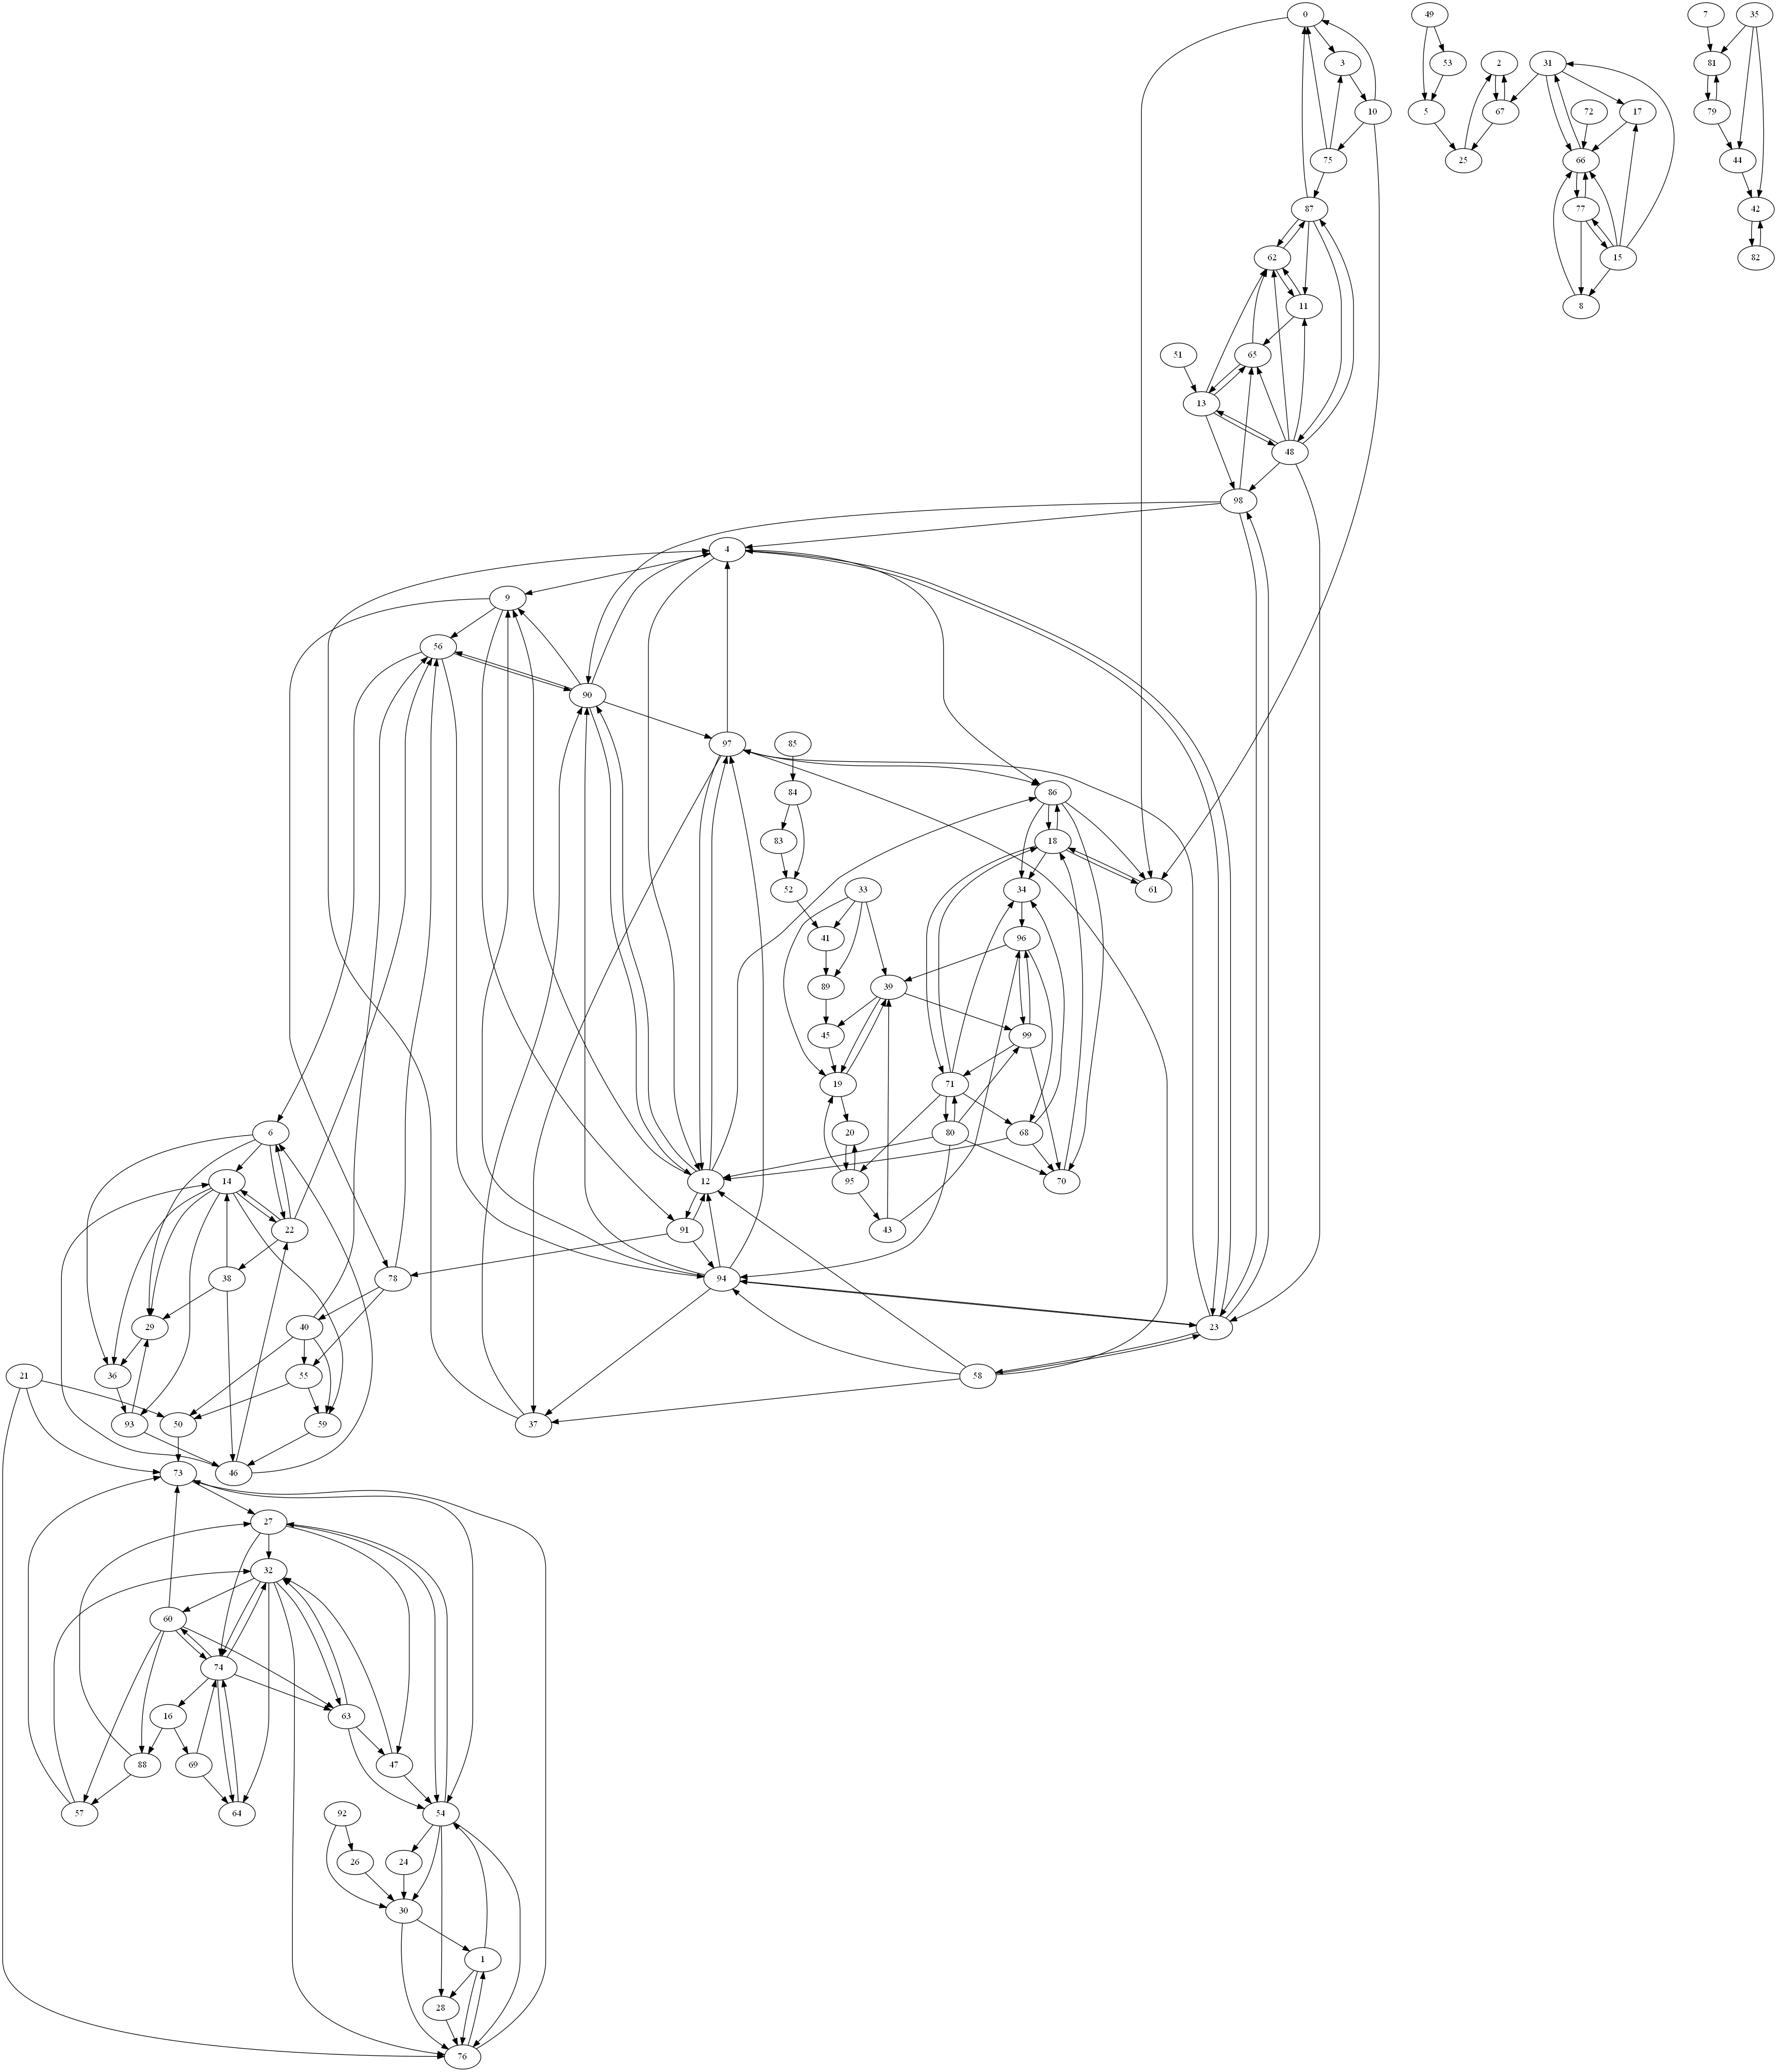

In [7]:
plt = Image(graph.create_png())
display(plt)

In [8]:
adj = np.zeros((len(web_graph.nodes), len(web_graph.nodes)))
for edge in web_graph.edges:
    adj[edge[0], edge[1]] = 1
adj.shape

(100, 100)

In [15]:
term = ''.lower()
root_set = set()
base_set = set()
for i in range(len(web_graph.nodes)):
    if term in web_graph.nodes[i]['page_content'].lower():
        root_set.add(i)
        base_set = base_set.union(set(np.where(adj[:, i] == 1)[0]))
        base_set = base_set.union(set(np.where(adj[i, :] == 1)[0]))
root_set, base_set

({0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99},
 {0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,

In [25]:
A = adj[list(base_set), :][:, list(base_set)]
A = adj

In [34]:
w, vr = linalg.eig(np.matmul(A, A.T), left=False, right=True)
vr = vr[:, 0] / np.sum(vr[:, 0])
np.where(vr, vr > 1e-10, 1) * vr

array([2.1490e-03+0.j, 4.5769e-05+0.j, 0.0000e+00-0.j, 0.0000e+00-0.j,
       7.3277e-02+0.j, 0.0000e+00-0.j, 1.2717e-03+0.j, 0.0000e+00+0.j,
       0.0000e+00-0.j, 1.2551e-02+0.j, 2.7552e-03+0.j, 1.0139e-02+0.j,
       6.5450e-02+0.j, 1.7090e-02+0.j, 1.0894e-03+0.j, 0.0000e+00-0.j,
       2.8664e-06+0.j, 0.0000e+00-0.j, 2.0913e-02+0.j, 2.9466e-04+0.j,
       2.9821e-04+0.j, 5.1170e-04+0.j, 9.1494e-03+0.j, 5.6290e-02+0.j,
       2.8813e-06+0.j, 0.0000e+00-0.j, 2.8813e-06+0.j, 1.7938e-05+0.j,
       3.6578e-05+0.j, 1.2227e-04+0.j, 4.0383e-05+0.j, 0.0000e+00-0.j,
       5.8776e-05+0.j, 5.4132e-04+0.j, 5.8088e-04+0.j, 0.0000e+00+0.j,
       5.6414e-05+0.j, 2.8171e-02+0.j, 9.4470e-04+0.j, 3.4068e-03+0.j,
       7.5540e-03+0.j, 2.8032e-05+0.j, 0.0000e+00-0.j, 8.4835e-04+0.j,
       0.0000e+00+0.j, 2.1779e-04+0.j, 3.0392e-03+0.j, 9.2298e-06+0.j,
       4.1755e-02+0.j, 0.0000e+00+0.j, 3.3085e-05+0.j, 2.5079e-03+0.j,
       2.8032e-05+0.j, 0.0000e+00+0.j, 4.9728e-05+0.j, 9.1252e-04+0.j,
      

In [37]:
w, vr = linalg.eig(np.matmul(A.T, A), left=False, right=True)
vr = vr[:, 0] / np.sum(vr[:, 0])
np.real(np.where(vr, vr > 1e-10, 1) * vr)

array([ 3.4463e-03,  1.7494e-05, -0.0000e+00,  1.2824e-03,  6.4968e-02,
       -0.0000e+00,  9.4911e-03,  0.0000e+00, -0.0000e+00,  7.5242e-02,
        0.0000e+00,  1.2666e-02,  1.2693e-01,  1.1532e-02,  3.2612e-03,
       -0.0000e+00,  4.6760e-06, -0.0000e+00,  4.5014e-03,  1.0015e-03,
        1.2504e-04,  0.0000e+00,  1.2226e-03,  8.3678e-02,  1.1258e-05,
       -0.0000e+00,  6.8607e-07,  1.4338e-05,  2.1620e-05,  8.0172e-04,
        1.3249e-05, -0.0000e+00,  2.1798e-05,  0.0000e+00,  1.7151e-02,
        0.0000e+00,  5.6222e-04,  6.0740e-02,  2.0713e-03,  1.2299e-03,
        1.5814e-03,  1.2890e-04, -0.0000e+00,  5.8335e-05, -0.0000e+00,
        8.1121e-04,  2.8102e-04,  6.4690e-06,  5.8958e-03,  0.0000e+00,
        2.0326e-03,  0.0000e+00,  0.0000e+00, -0.0000e+00,  2.0643e-05,
        3.2916e-03,  2.7247e-02,  1.3240e-05,  1.2744e-02,  2.1634e-03,
        1.7983e-05,  8.5992e-03,  1.9155e-02,  2.9865e-05,  2.0652e-05,
        2.7468e-02, -0.0000e+00, -0.0000e+00,  2.1523e-03,  6.48

In [36]:
np.array(list(nx.hits(web_graph)[1].values()))

array([ 3.4463e-03,  1.7494e-05, -1.3956e-19,  1.2824e-03,  6.4968e-02,
       -3.9087e-19,  9.4911e-03, -0.0000e+00, -2.5042e-18,  7.5242e-02,
        1.8581e-18,  1.2666e-02,  1.2693e-01,  1.1532e-02,  3.2612e-03,
        1.2621e-18,  4.6760e-06, -3.9628e-18,  4.5014e-03,  1.0015e-03,
        1.2504e-04, -0.0000e+00,  1.2226e-03,  8.3678e-02,  1.1258e-05,
       -2.2730e-18,  6.8607e-07,  1.4338e-05,  2.1620e-05,  8.0172e-04,
        1.3249e-05, -2.4003e-18,  2.1798e-05, -0.0000e+00,  1.7151e-02,
       -0.0000e+00,  5.6222e-04,  6.0740e-02,  2.0713e-03,  1.2299e-03,
        1.5814e-03,  1.2890e-04, -1.1317e-18,  5.8335e-05, -1.5082e-18,
        8.1121e-04,  2.8102e-04,  6.4690e-06,  5.8958e-03, -0.0000e+00,
        2.0326e-03, -0.0000e+00, -1.3256e-18,  1.3873e-18,  2.0643e-05,
        3.2916e-03,  2.7247e-02,  1.3240e-05,  1.2744e-02,  2.1634e-03,
        1.7983e-05,  8.5992e-03,  1.9155e-02,  2.9865e-05,  2.0652e-05,
        2.7468e-02, -5.2108e-18, -1.3732e-19,  2.1523e-03,  6.48